<a href="https://colab.research.google.com/github/Abhinavk910/Regression/blob/master/Loan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()
! pip install -q kaggle
! mkdir -p ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
! ! kaggle datasets download -d abhinavkum/aap-loan-document

 70% 17.0M/24.2M [00:00<00:00, 39.2MB/s]
100% 24.2M/24.2M [00:00<00:00, 45.0MB/s]


In [0]:
! unzip -q 'aap-loan-document.zip'

replace loan.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [0]:
import pandas as pd
pd.set_option('display.max_column', 20)
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [0]:
# data = pd.read_excel('loan.xlsx')      # LC Lendig Club
# data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingc...,Borrower added...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingc...,Borrower added...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [0]:
empty = data.isnull().sum()[data.isnull().sum() != 0]
print(len(empty))
empty

68


emp_title                          2459
emp_length                         1075
desc                              12940
title                                12
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


In [0]:
# Deleting Data which have no value in it mean null value is 39717

In [0]:
empty_list = empty[empty.values == 39717].index.tolist()
data_new = data[[w for w in data.columns if w not in empty_list]]
data_new.shape

(39717, 57)

In [0]:
data_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [0]:
data = data_new.copy()

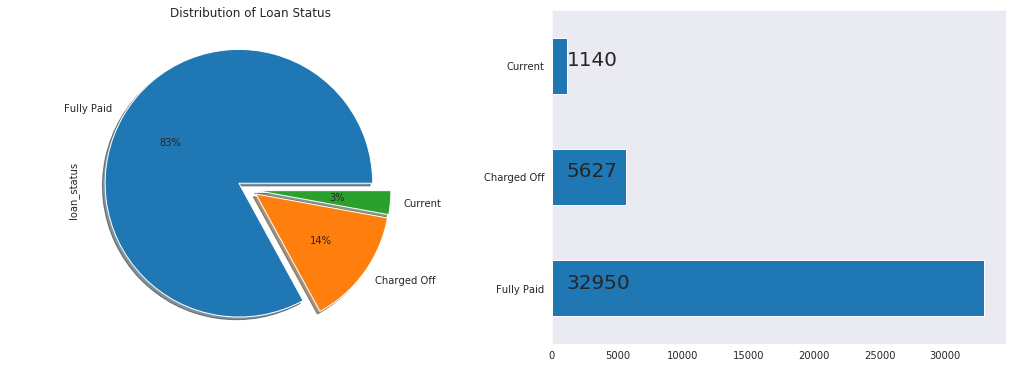

In [0]:
plt.figure(figsize = (14,5), constrained_layout=True)
plt.subplot(121)
data.loan_status.value_counts().plot(kind = 'pie', explode = [0.1,0.05,0.05], shadow = True, autopct = '%1.0f%%',
                                    title = 'Distribution of Loan Status' )
plt.subplot(122)
ax = data.loan_status.value_counts().plot(kind = 'barh')
for i,j in enumerate(data.loan_status.value_counts().values):
    ax.text(1140,i,j,fontsize=20)
plt.show()

#####  loan_amnt	:
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


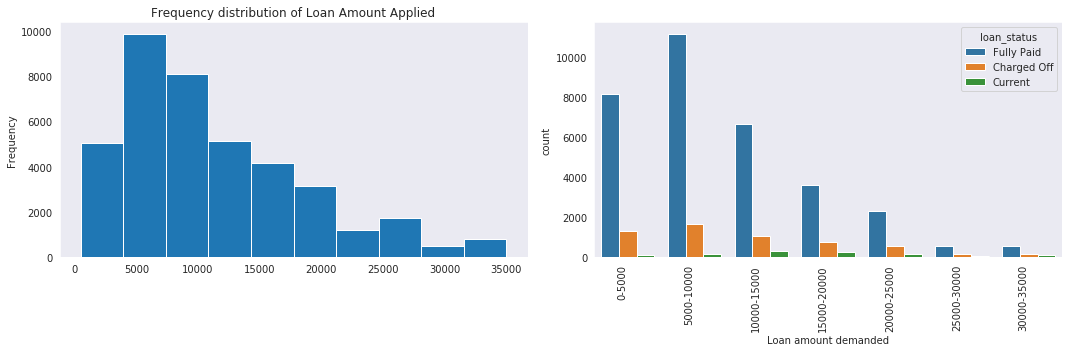

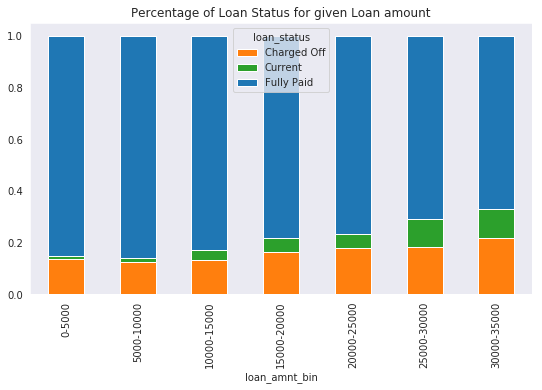

In [0]:
lable = 'loan_amnt'
print(data[lable].describe())

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data.loan_amnt.plot('hist', title = 'Frequency distribution of Loan Amount Applied')
X = str(lable+'_bin')
bins = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
data[X] = pd.cut(data['loan_amnt'], bins=bins, labels=labels)

hue = 'loan_status'
plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data,palette=["C0", "C1", "C2"])
plt.xlabel('Loan amount demanded')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),color=["C1", "C2", "C0"],
                                                     title = 'Percentage of Loan Status for given Loan amount')
plt.show()

As Loan Amount applied increases more is increase in chance of default

#####  funded_amnt:-
The total amount committed to that loan at that point in time.

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


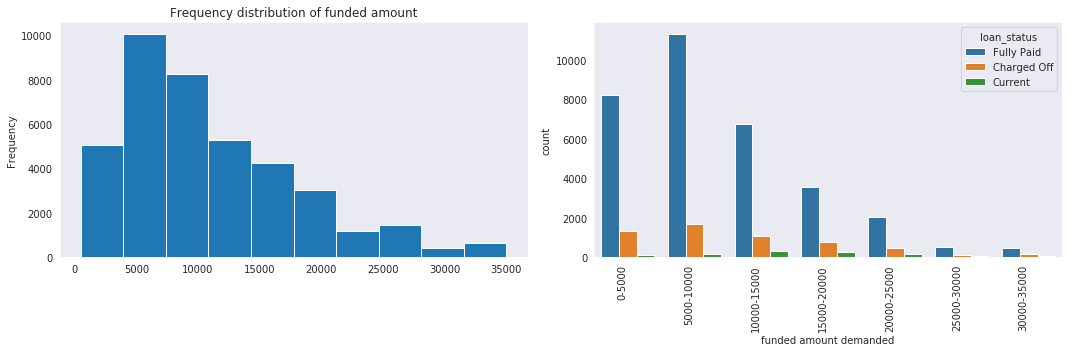

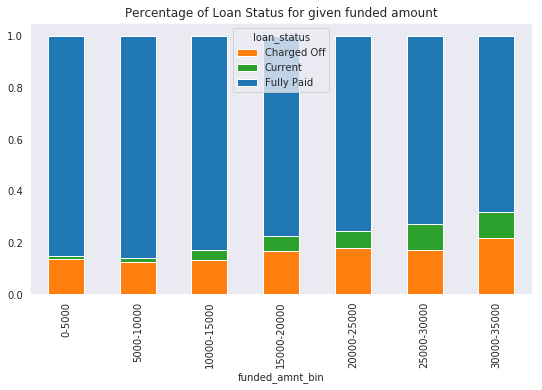

In [0]:
lable = 'funded_amnt'
print(data[lable].describe())

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = 'Frequency distribution of funded amount')
X = str(lable+'_bin')
bins = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
data[X] = pd.cut(data[lable], bins=bins, labels=labels)

hue = 'loan_status'
plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = 'Percentage of Loan Status for given funded amount')
plt.show()

######  is loan demanded or funded amount equal

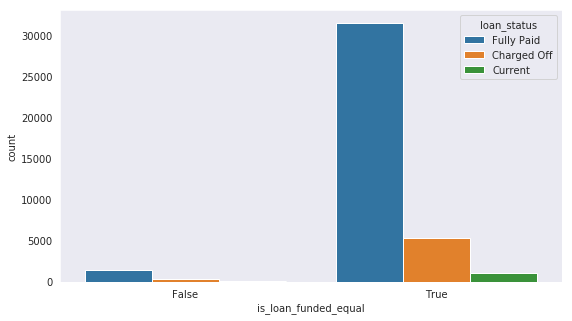

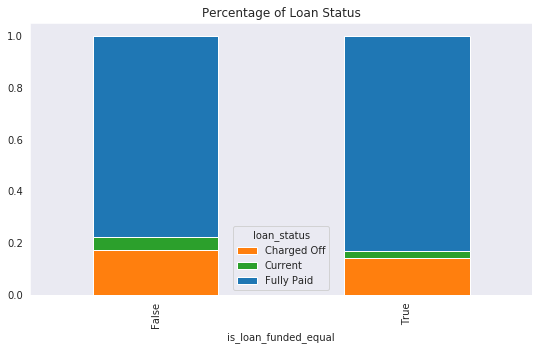

In [0]:
data['is_loan_funded_equal'] = data.apply(lambda x: True if x['loan_amnt'] == x['funded_amnt'] else False,
                                          axis = 1)
plt.figure(figsize = (9,5))
sns.countplot(x = 'is_loan_funded_equal', hue = hue, data = data, palette=["C0", "C1", "C2"])
pd.crosstab(data['is_loan_funded_equal'],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),
                                                                           color=["C1", "C2", "C0"],
                                                                    title = 'Percentage of Loan Status')
plt.show()

If above both are not equal then chance of being defaulter increase

####  funded_amnt_inv:
The total amount committed by investors for that loan at that point in time.

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


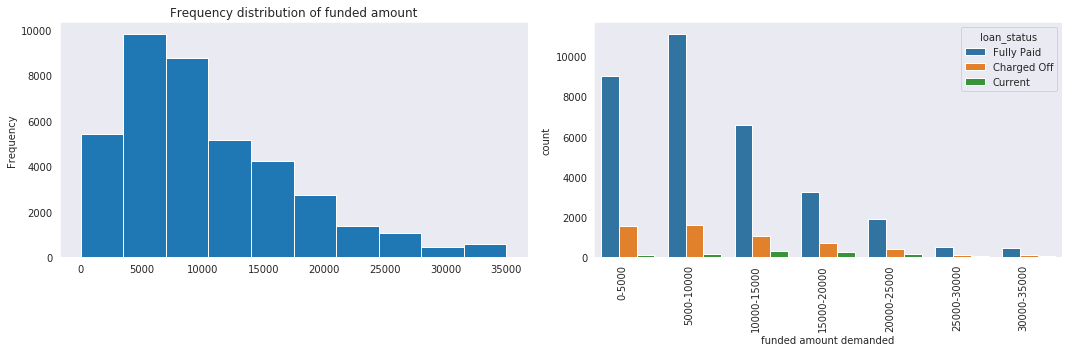

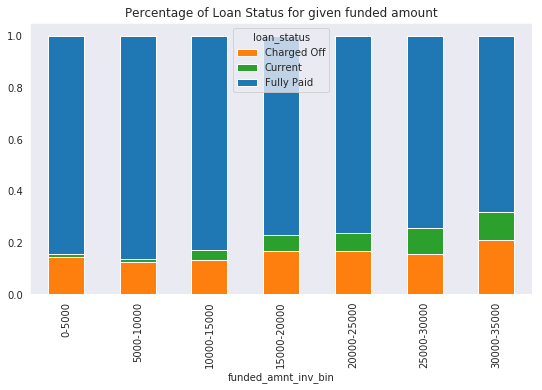

In [0]:
lable = 'funded_amnt_inv'
print(data[lable].describe())

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = 'Frequency distribution of funded amount')

bins = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
data[str(lable+'_bin')] = pd.cut(data[lable], bins=bins, labels=labels)
X = str(lable+'_bin')
hue = 'loan_status'
plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = 'Percentage of Loan Status for given funded amount')
plt.show()

min is zero. Something fishy here.

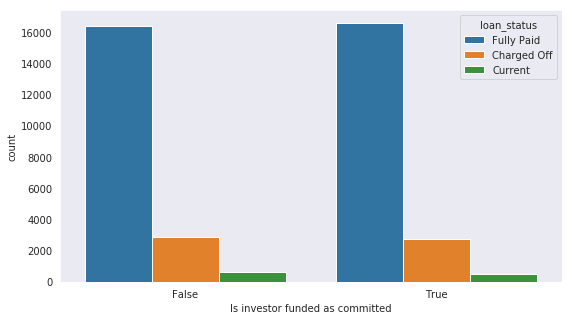

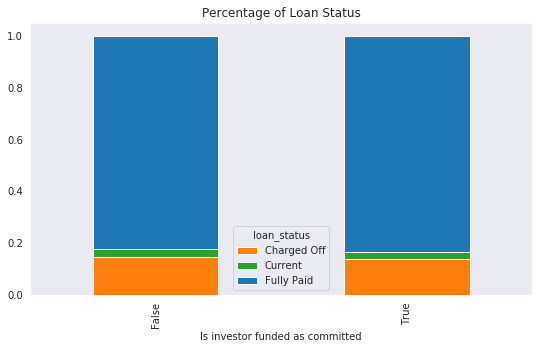

In [0]:
X = 'is_invfunded_funded_equal'
data[X] = data.apply(lambda x: True if x['funded_amnt'] == x['funded_amnt_inv'] else False,
                                          axis = 1)
plt.figure(figsize = (9,5))
sns.countplot(x = X, hue = hue, data = data, palette=["C0", "C1", "C2"])
plt.xlabel('Is investor funded as committed')
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5),
                                                                           color=["C1", "C2", "C0"],
                                                                    title = 'Percentage of Loan Status')
plt.xlabel('Is investor funded as committed')
plt.show()

<Figure size 1008x360 with 0 Axes>

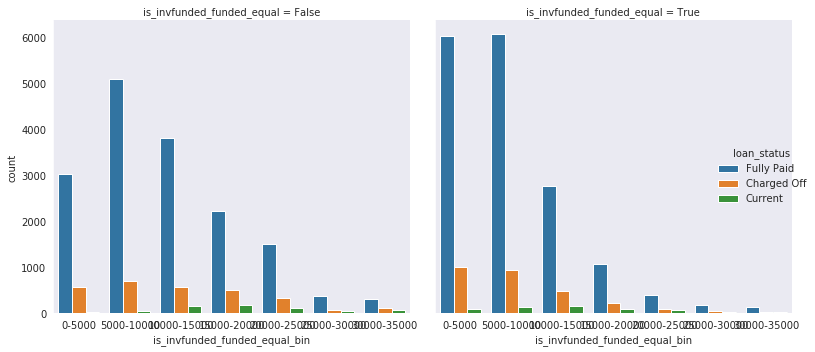

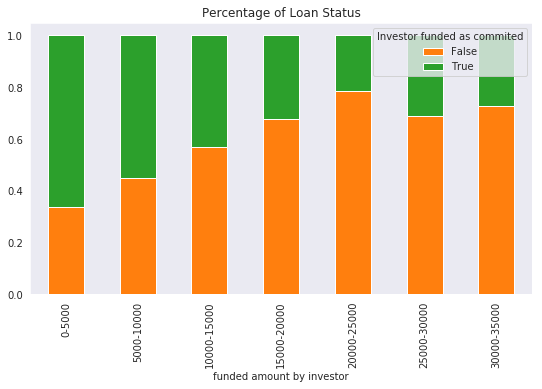

In [0]:
lable = 'is_invfunded_funded_equal'
title_crosstab = 'Percentage of Loan Status'
bins = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
data[str(lable+'_bin')] = pd.cut(data["funded_amnt_inv"], bins=bins, labels=labels)
X = str(lable+'_bin')
hue = 'loan_status'
plt.figure(figsize = (14,5))
sns.catplot(x = X, hue = hue, col = lable, kind = 'count', data = data)
plt.tight_layout()
pd.crosstab(data[X],data[lable],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = title_crosstab )
plt.xlabel('funded amount by investor')
plt.legend(title ='Investor funded as commited')
plt.show()

As expected, investor easily give lower amount compair to higher one

####  term:
The number of payments on the loan. Values are in months and can be either 36 or 60.


<Figure size 1080x360 with 0 Axes>

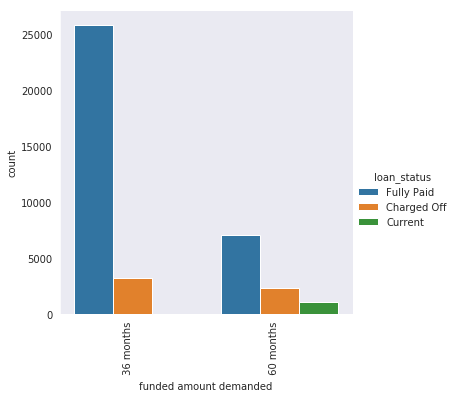

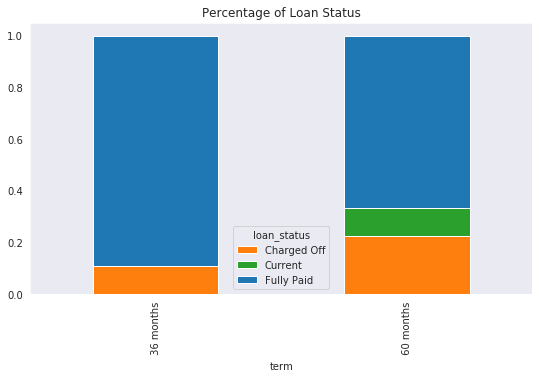

In [0]:
lable = 'term'
title_crosstab = 'Percentage of Loan Status'
plt.figure(figsize = (15,5))
hue = 'loan_status'
sns.catplot(x = lable, hue = hue, kind = 'count', data = data, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')

pd.crosstab(data[lable],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = title_crosstab)
plt.show()

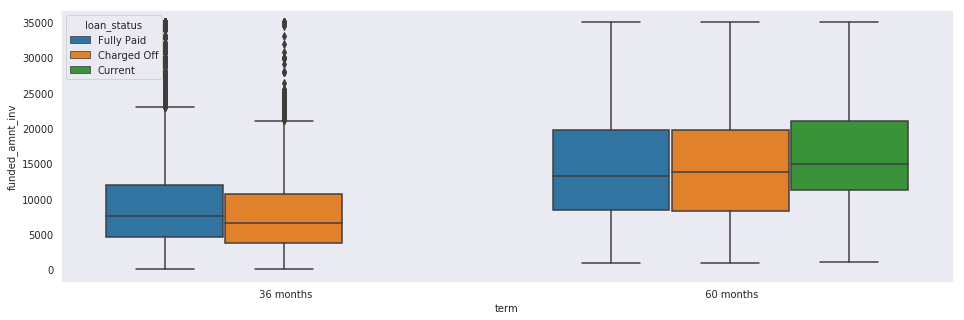

In [0]:
plt.figure( figsize = (16,5))
sns.boxplot(x = 'term', y = 'funded_amnt_inv', hue = 'loan_status', data = data)
plt.show()

#####  int_rate:
Interest Rate on the loan

count    39717.000000
mean         0.120212
std          0.037248
min          0.054200
25%          0.092500
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64


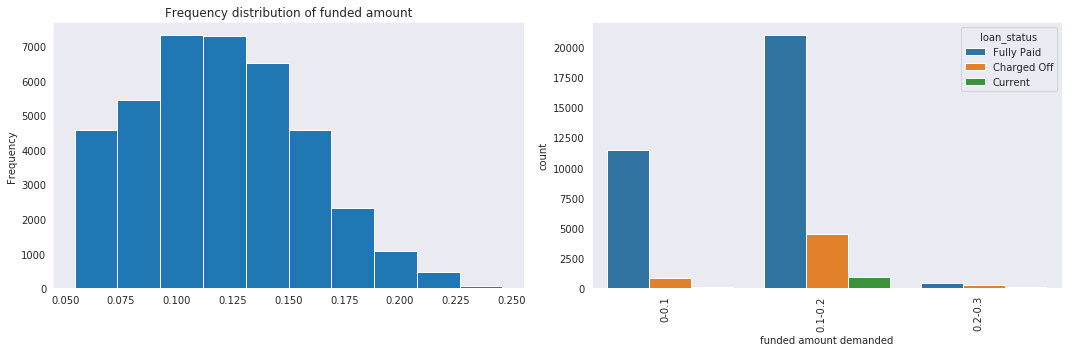

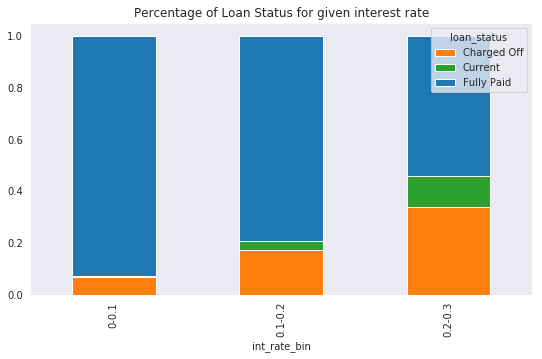

In [0]:
lable = 'int_rate'
print(data[lable].describe())

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = 'Frequency distribution of funded amount')

bins = [0,0.1,0.2,0.3]
labels = ['0-0.1','0.1-0.2','0.2-0.3']
data[str(lable+'_bin')] = pd.cut(data[lable], bins=bins, labels=labels)
X = str(lable+'_bin')
hue = 'loan_status'
plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = 'Percentage of Loan Status for given interest rate')
plt.show()

So more the percentage of interest more will be defaulter

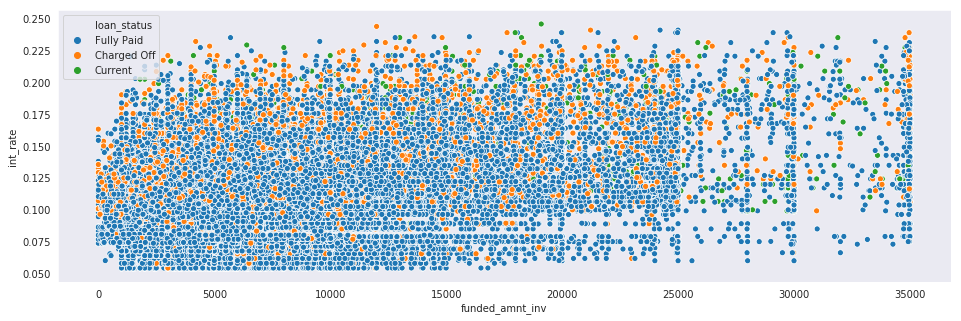

In [0]:
plt.figure( figsize = (16,5))
g = sns.scatterplot(x = 'funded_amnt_inv', y = 'int_rate', hue = 'loan_status', data = data)


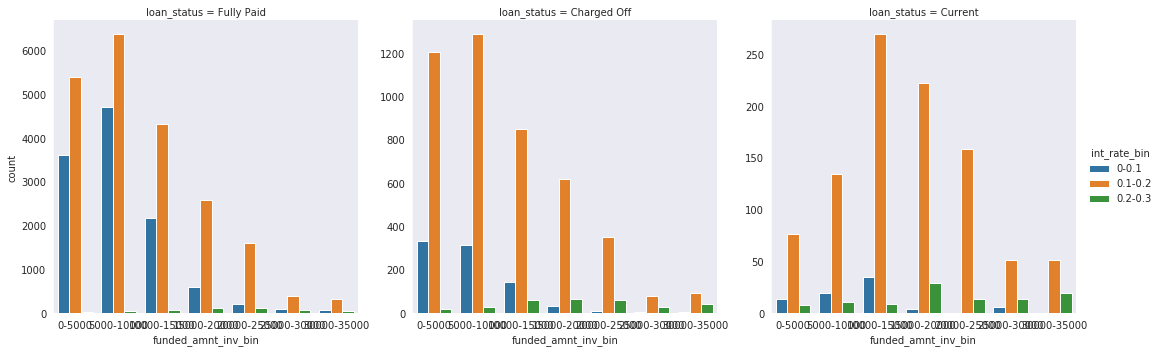

In [0]:
g = sns.catplot(x = 'funded_amnt_inv_bin', hue = 'int_rate_bin', col = 'loan_status', kind = 'count', data = data, sharey=False)

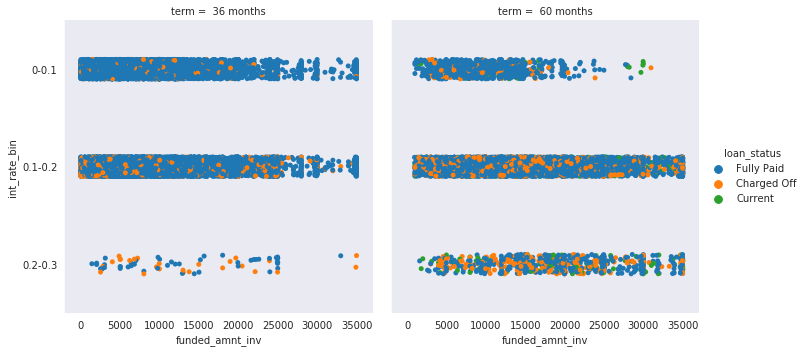

In [0]:
g = sns.catplot(x = "funded_amnt_inv", y = "int_rate_bin", hue = "loan_status", col = "term", data=data)

####  installment:
The monthly payment owed by the borrower if the loan originates.


count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


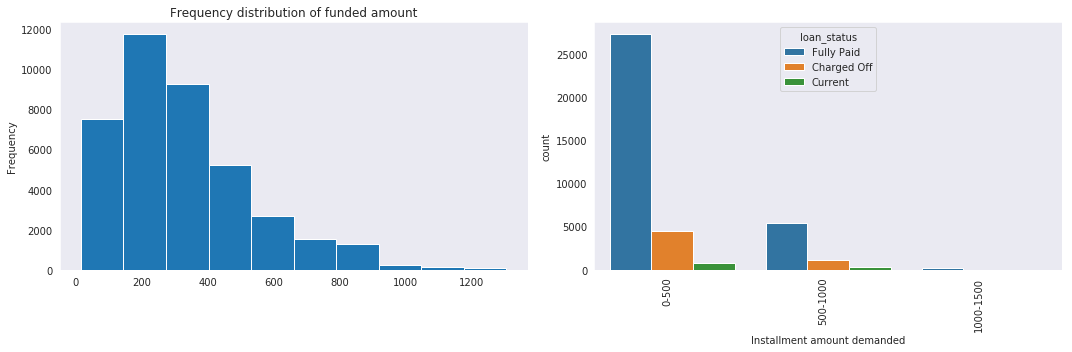

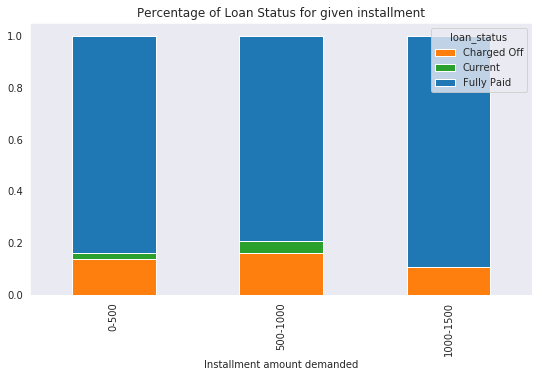

In [0]:
lable = 'installment'
print(data[lable].describe())

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data[lable].plot('hist', title = 'Frequency distribution of funded amount')

bins = [0,500,1000, 1500]
labels = ['0-500','500-1000','1000-1500']
data[str(lable+'_bin')] = pd.cut(data[lable], bins=bins, labels=labels)
X = str(lable+'_bin')
hue = 'loan_status'
plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data, palette=["C0", "C1", "C2"])
plt.xlabel('Installment amount demanded')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data[X],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = 'Percentage of Loan Status for given installment')
plt.xlabel('Installment amount demanded')
plt.show()

#### grade:
LC assigned loan grade

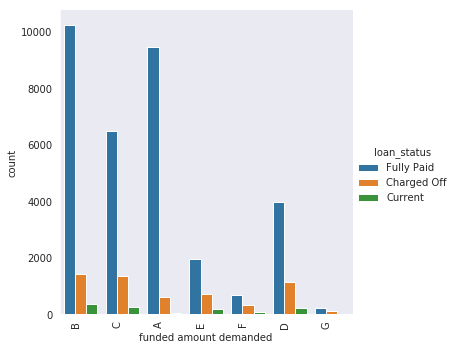

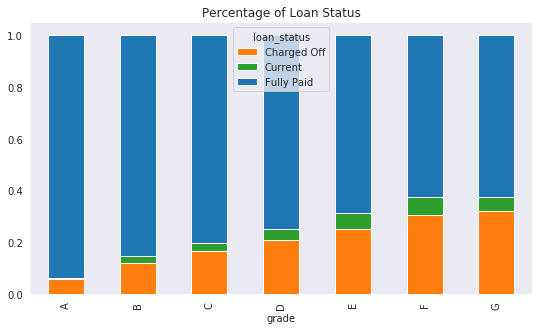

In [0]:
lable = 'grade'
title_crosstab = 'Percentage of Loan Status'
hue = 'loan_status'
sns.catplot(x = lable, hue = hue, kind = 'count', data = data, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')

pd.crosstab(data[lable],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = title_crosstab)
plt.show()

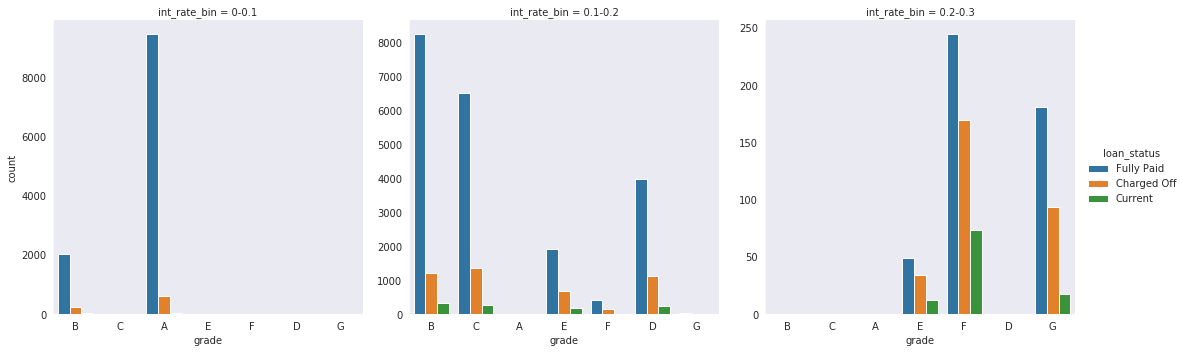

In [0]:
g = sns.catplot(x = 'grade', col = 'int_rate_bin', hue = 'loan_status', kind = 'count', data = data, sharey=False)

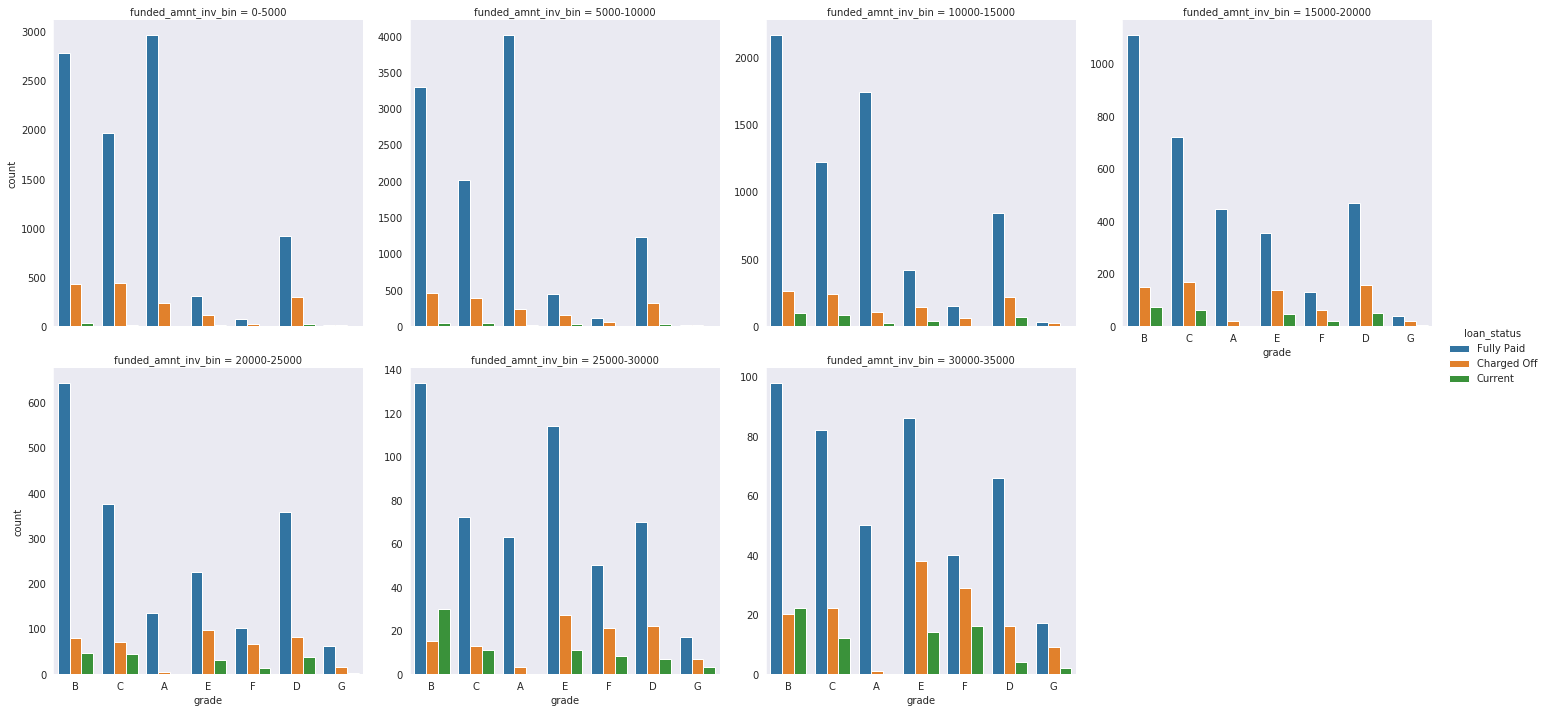

In [0]:
g = sns.catplot(x = 'grade', col = 'funded_amnt_inv_bin', hue = 'loan_status', kind = 'count', data = data, sharey=False,
                col_wrap=4)

#### sub_grade:
LC assigned loan subgrade

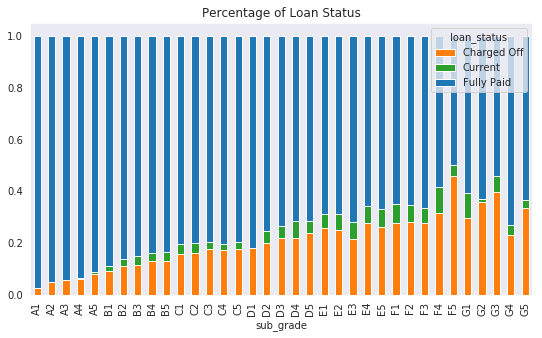

In [0]:
lable = 'sub_grade'
title_crosstab = 'Percentage of Loan Status'
hue = 'loan_status'
pd.crosstab(data[lable],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = title_crosstab)
plt.show()

#### emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


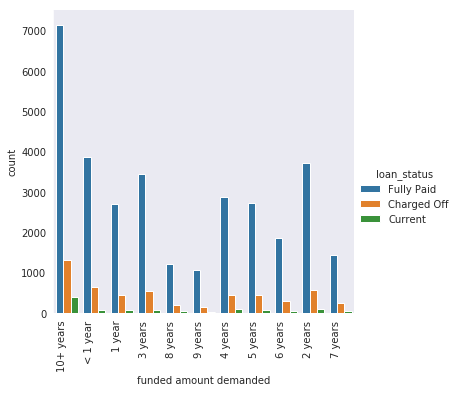

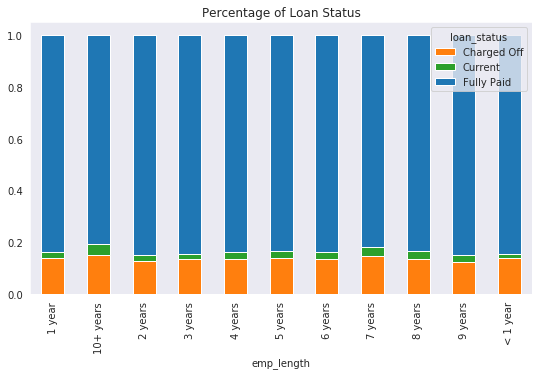

In [0]:
lable = 'emp_length'
title_crosstab = 'Percentage of Loan Status'
hue = 'loan_status'
sns.catplot(x = lable, hue = hue, kind = 'count', data = data, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')

pd.crosstab(data[lable],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = title_crosstab)
plt.show()

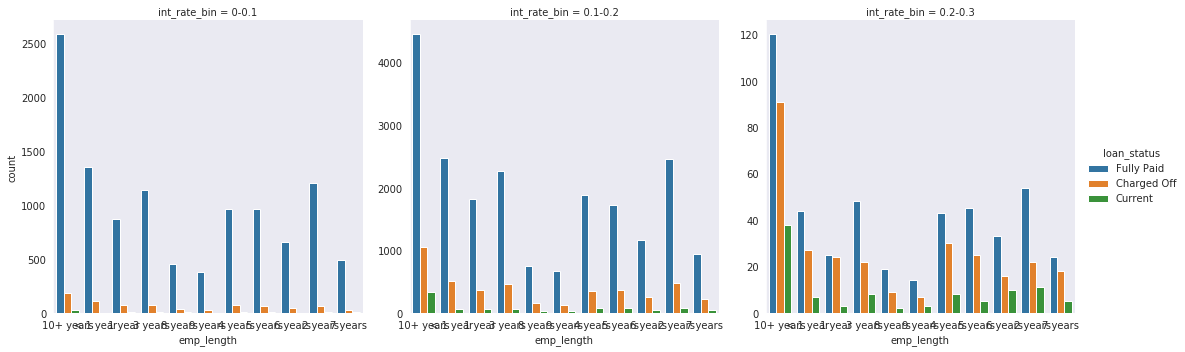

In [0]:
g = sns.catplot(x = 'emp_length', col = 'int_rate_bin', hue = 'loan_status', kind = 'count', data = data, sharey=False)

####  home_ownership:
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

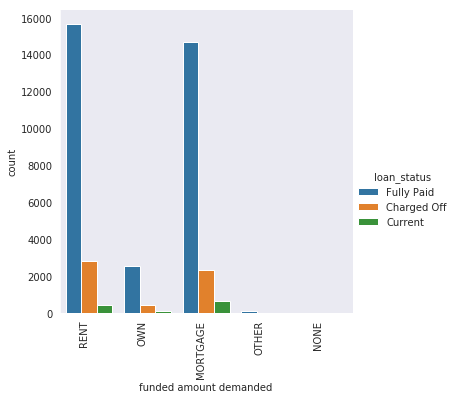

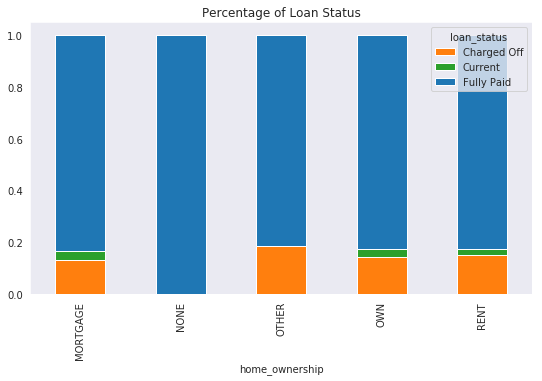

In [0]:
lable = 'home_ownership'
title_crosstab = 'Percentage of Loan Status'
hue = 'loan_status'
sns.catplot(x = lable, hue = hue, kind = 'count', data = data, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')

pd.crosstab(data[lable],data[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = title_crosstab)
plt.show()

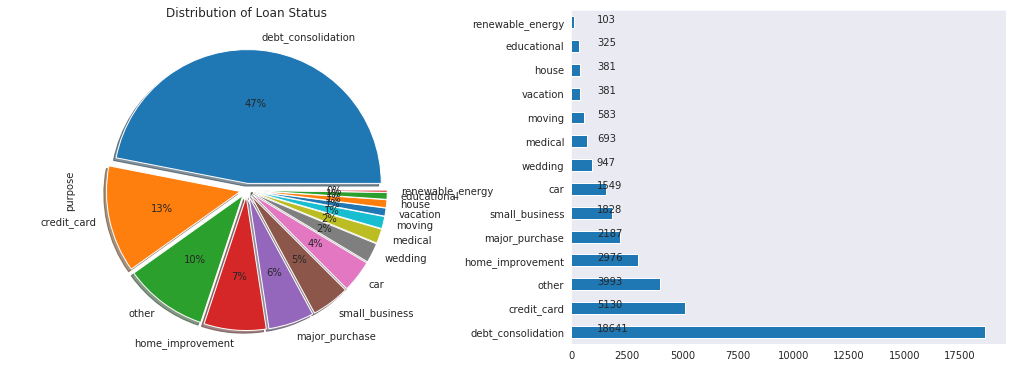

In [0]:
plt.figure(figsize = (14,5), constrained_layout=True)
plt.subplot(121)
data.purpose.value_counts().plot(kind = 'pie', explode = [0.05 for i in range(14)], shadow = True, autopct = '%1.0f%%',
                                    title = 'Distribution of Loan Status' )
plt.subplot(122)
ax = data.purpose.value_counts().plot(kind = 'barh')
for i,j in enumerate(data.purpose.value_counts().values):
    ax.text(1140,i,j,fontsize=10)
plt.show()

# Data cleaning

In [0]:
empty = data.isnull().sum()[data.isnull().sum() != 0]

In [0]:
empty_list = empty[empty.values == 39717].index.tolist()
data = data[[w for w in data.columns if w not in empty_list]]
data.shape

(39717, 66)

In [0]:
data.isnull().sum()[data.isnull().sum() != 0]

emp_title                         2459
emp_length                        1075
desc                             12940
title                               12
mths_since_last_delinq           25682
mths_since_last_record           36931
revol_util                          50
last_pymnt_d                        71
next_pymnt_d                     38577
last_credit_pull_d                   2
collections_12_mths_ex_med          56
chargeoff_within_12_mths            56
pub_rec_bankruptcies               697
tax_liens                           39
funded_amnt_inv_bin                129
is_invfunded_funded_equal_bin      129
dtype: int64

In [0]:
data.loan_status[data.mths_since_last_delinq.isnull()].value_counts()

Fully Paid     21420
Charged Off     3485
Current          777
Name: loan_status, dtype: int64

In [0]:
data.revol_util.value_counts(dropna = False).count(), data.revol_util.value_counts(dropna = False).head(2)

(1090, 0.000    977
 0.002     63
 Name: revol_util, dtype: int64)

In [0]:
data.dropna(axis = 0, subset = ['revol_util'], inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
data.last_pymnt_d  = data.last_pymnt_d.max() - data.last_pymnt_d  
data.last_pymnt_d  = data.last_pymnt_d.apply(lambda x : str(x).split(" ")[0])
data.last_pymnt_d  = data.last_pymnt_d.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
data.last_credit_pull_d.max(), data.last_credit_pull_d.min()

(Timestamp('2016-05-01 00:00:00'), Timestamp('2007-05-01 00:00:00'))

In [0]:
data.last_credit_pull_d = data.last_credit_pull_d.max() - data.last_credit_pull_d 
data.last_credit_pull_d = data.last_credit_pull_d.apply(lambda x : str(x).split(" ")[0])
data.last_credit_pull_d = data.last_credit_pull_d.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
data.collections_12_mths_ex_med.value_counts(dropna = False)

0.0    39611
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

In [0]:
data.last_credit_pull_d.value_counts(dropna = False).tail(10)

3135    3
3012    3
NaT     2
3074    2
3165    2
3227    1
3288    1
2861    1
2922    1
2891    1
Name: last_credit_pull_d, dtype: int64

we will drop this column.

In [0]:
data.chargeoff_within_12_mths.value_counts(dropna = False) 
# we will drop this column

0.0    39611
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

In [0]:
data.loan_status[data.chargeoff_within_12_mths.isnull()].value_counts()

Fully Paid     50
Charged Off     6
Name: loan_status, dtype: int64

In [0]:
data.groupby(['loan_status', 'chargeoff_within_12_mths'])['id'].count()

loan_status  chargeoff_within_12_mths
Charged Off  0.0                          5605
Current      0.0                          1140
Fully Paid   0.0                         32866
Name: id, dtype: int64

we will drop chargeoff_within_12_mths column 

In [0]:
data.pub_rec_bankruptcies.value_counts(dropna = False) 

0.0    37290
1.0     1673
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [0]:
data.loan_status[data.pub_rec_bankruptcies.isnull()].value_counts()

Fully Paid     579
Charged Off    118
Name: loan_status, dtype: int64

In [0]:
data.groupby(['loan_status', 'pub_rec_bankruptcies'])['id'].count()

loan_status  pub_rec_bankruptcies
Charged Off  0.0                      5125
             1.0                       366
             2.0                         2
Current      0.0                      1101
             1.0                        37
             2.0                         2
Fully Paid   0.0                     31064
             1.0                      1270
             2.0                         3
Name: id, dtype: int64

In [0]:
# as Fully Paid have value common is 0
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
data.tax_liens.value_counts() # gonna drop this one cus its contain only one value

0.0    39628
Name: tax_liens, dtype: int64

In [0]:
to_drop = ['id', 'member_id','emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 's_invfunded_funded_equal_bin',
           'tax_liens','url','chargeoff_within_12_mths', 'collections_12_mths_ex_med','next_pymnt_d', 'pymnt_plan', 'zip_code', 'funded_amnt_inv_bin' ]

data.drop(labels = to_drop, axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

In [0]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,loan_amount_bin,loan_amnt_bin,funded_amnt_bin,is_loan_funded_equal,is_invfunded_funded_equal,int_rate_bin,installment_bin
0,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,RENT,24000.0,...,0,0,0.0,0-5000,0-5000,0-5000,True,False,0.1-0.2,0-500
1,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,RENT,30000.0,...,0,0,0.0,0-5000,0-5000,0-5000,True,True,0.1-0.2,0-500


In [0]:
data.sub_grade = data.sub_grade.apply(lambda x: int(x[1]))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
data.issue_d  = data.issue_d.max() - data.issue_d  
data.issue_d  = data.issue_d.apply(lambda x : str(x).split(" ")[0])
data.issue_d  = data.issue_d.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
data.earliest_cr_line  = data.earliest_cr_line.max() - data.earliest_cr_line 
data.earliest_cr_line  = data.earliest_cr_line.apply(lambda x : str(x).split(" ")[0])
data.earliest_cr_line  = data.earliest_cr_line.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,loan_amount_bin,loan_amnt_bin,funded_amnt_bin,is_loan_funded_equal,is_invfunded_funded_equal,int_rate_bin,installment_bin
0,5000,5000,4975.0,36 months,0.1065,162.87,B,2,RENT,24000.0,...,0,0,0.0,0-5000,0-5000,0-5000,True,False,0.1-0.2,0-500


In [0]:
y = data.pop('loan_status')
X = data

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encode = LabelEncoder()
y = encode.fit_transform(y)

In [0]:
pd.Series(y).value_counts()

2    32916
0     5611
1     1140
dtype: int64

In [0]:
X = pd.get_dummies(X)
X.shape

(39667, 931)

In [0]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Model Preparation

In [0]:
from sklearn.metrics import accuracy_score, f1_score
def check(y_pred, y_test = y_test):
    print('Accuracy Score : ', accuracy_score(y_test, y_pred))
    print('f1 Score : ', f1_score(y_test, y_pred, average = 'weighted'))
    

In [0]:
pd.Series(y_train).value_counts()  # IMBALACE dataset

2    22064
0     3790
1      722
dtype: int64

Base Model

In [0]:
y_pred = np.array([2 for i in range(X_test.shape[0])])

In [0]:
check(y_pred=y_pred, y_test=y_test)

Accuracy Score :  0.8289664655106562
f1 Score :  0.7514466928723753


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
modellor = LogisticRegression(fit_intercept=False, random_state=42)

In [0]:
y_pred = modellor.fit(X_train, y_train).predict(X_test)
check(y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score :  0.9981666793980597
f1 Score :  0.9981620431469503


In [0]:
for i in range(3):

  print('for ',encode.classes_[i])
  series = pd.Series(data = modellor.coef_[i], index = X_train.columns).sort_values(ascending = False)
  print(series.head(5),"\n")
#   print(series.tail(5), "\n")

for  Charged Off
funded_amnt        0.022807
total_rec_int      0.008659
recoveries         0.008268
funded_amnt_inv    0.007151
installment        0.001926
dtype: float64 

for  Current
out_prncp          0.048976
out_prncp_inv      0.048241
total_rec_int      0.002101
total_rec_prncp    0.001733
total_pymnt_inv    0.001727
dtype: float64 

for  Fully Paid
total_rec_prncp    0.026465
total_pymnt        0.006969
dti                0.003881
total_pymnt_inv    0.003002
installment        0.002936
dtype: float64 



In [0]:
! pip install eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

In [0]:
my_model = modellor
val_X = X_test
val_y = y_test

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.4891 ± 0.0070,total_rec_prncp
0.4329 ± 0.0027,funded_amnt
0.3566 ± 0.0057,total_pymnt
0.3443 ± 0.0046,funded_amnt_inv
0.3407 ± 0.0056,total_pymnt_inv
0.2382 ± 0.0056,total_rec_int
0.0213 ± 0.0007,out_prncp_inv
0.0213 ± 0.0008,out_prncp
0.0124 ± 0.0015,recoveries
0.0033 ± 0.0009,loan_amnt


In [0]:
# So total_rec_prncp - Principal received to date is hightes importance 
# but its this factor is after payment so  i will go with funded_amnt

In [0]:
data_new.shape

(39717, 57)

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


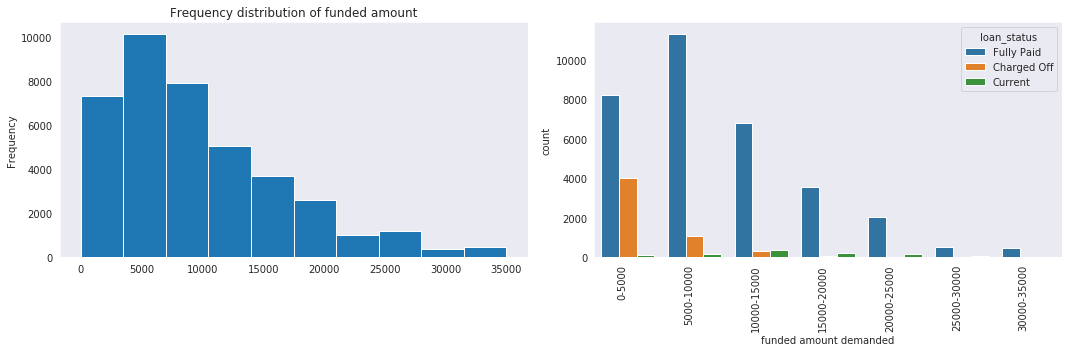

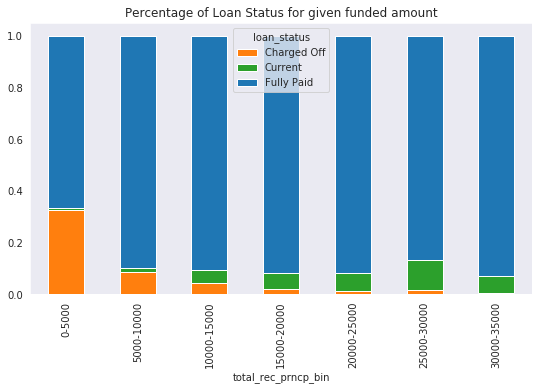

In [0]:
lable = 'total_rec_prncp'
print(data_new[lable].describe())

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data_new[lable].plot('hist', title = 'Frequency distribution of funded amount')

bins = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
data_new[str(lable+'_bin')] = pd.cut(data_new[lable], bins=bins, labels=labels)
X = str(lable+'_bin')
hue = 'loan_status'
plt.subplot(1,2,2)
sns.countplot(x = X, hue = hue, data = data_new, palette=["C0", "C1", "C2"])
plt.xlabel('funded amount demanded')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
pd.crosstab(data_new[X],data_new[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = 'Percentage of Loan Status for given funded amount')
plt.show()


In [0]:
data_new['percentage_recieved'] = data_new.apply(lambda x: x['total_rec_prncp']/x['funded_amnt']*100, axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
data_new['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


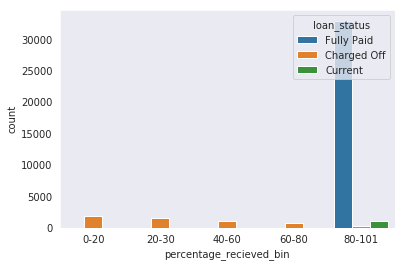

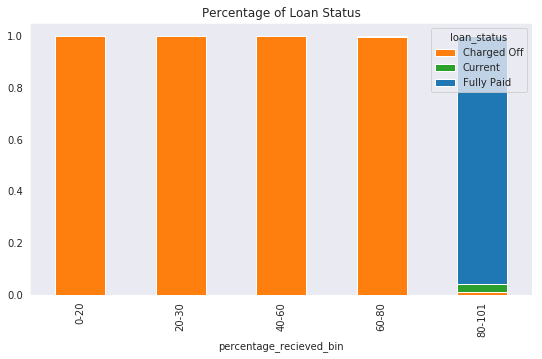

In [0]:
lable = 'percentage_recieved'
# bins = [0,90,95,97,99,101]
bins = [0,20,40,60,80,101]
labels = ['0-20','20-30','40-60','60-80','80-101']
data_new['percentage_recieved_bin'] = pd.cut(data_new[lable], bins=bins, labels=labels)
sns.countplot(x = 'percentage_recieved_bin', hue = hue, data = data_new, palette=["C0", "C1", "C2"])
pd.crosstab(data_new['percentage_recieved_bin'],data_new[hue],normalize='index').plot(kind='bar', stacked = True, figsize = (9,5), color=["C1", "C2", "C0"],
                                                     title = 'Percentage of Loan Status')
plt.show()



In [0]:
# means whose percentage upto certain date is not up to 80 then they are Charged Off